In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
%matplotlib notebook

<IPython.core.display.Javascript object>


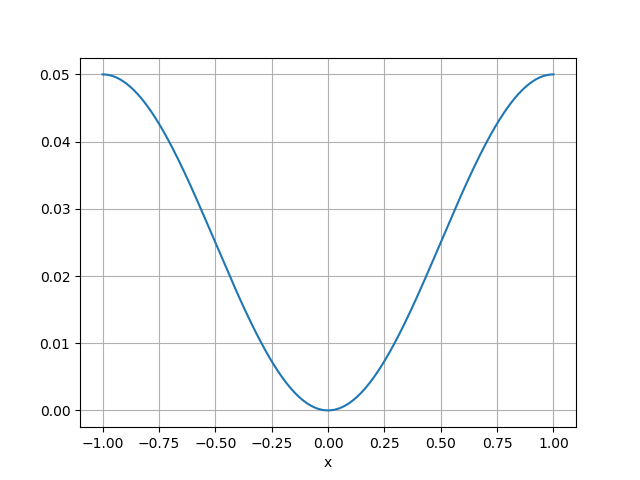

In [163]:
xmax = 1
amp = .05
x = np.linspace(-xmax,xmax,500001)
z = -amp/2*np.cos(x/xmax*np.pi)+amp/2
plt.figure()
plt.plot(x,z)
plt.xlabel('x')
plt.grid(True)

<IPython.core.display.Javascript object>


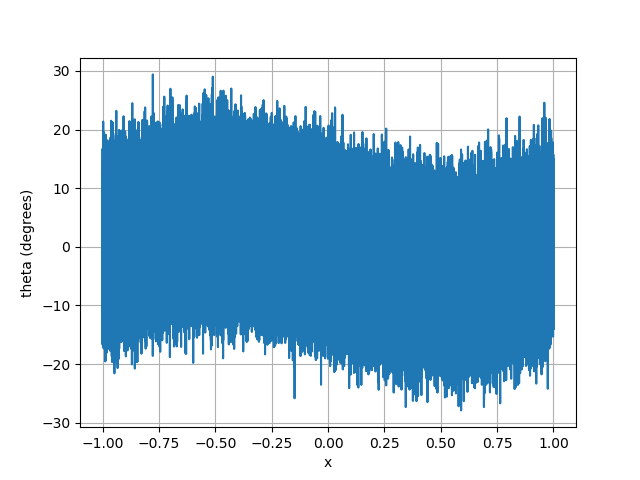

In [164]:
ampnoise = 0.1
theta = -np.arctan2(np.diff(z),np.diff(x)) +ampnoise*np.random.randn(len(z[1:]))
plt.figure()
plt.plot(x[1:],theta*180/np.pi)
plt.ylabel('theta (degrees)')
plt.xlabel('x')
plt.grid(True)

<IPython.core.display.Javascript object>


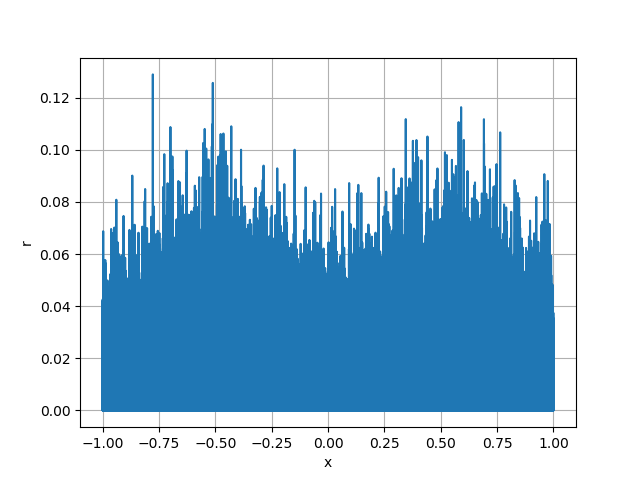

In [165]:
r = 1-np.cos(theta)
thesearetoohigh = np.argwhere(r>.99)
plt.figure()
plt.plot(x[1:],r)
plt.ylabel('r')
plt.xlabel('x')
plt.grid(True)

if(len(thesearetoohigh)>0):
    print('fixing ...', len((thesearetoohigh)))
    r[thesearetoohigh]=0.9

1538.0802769790764
1.0000000000000002


<IPython.core.display.Javascript object>


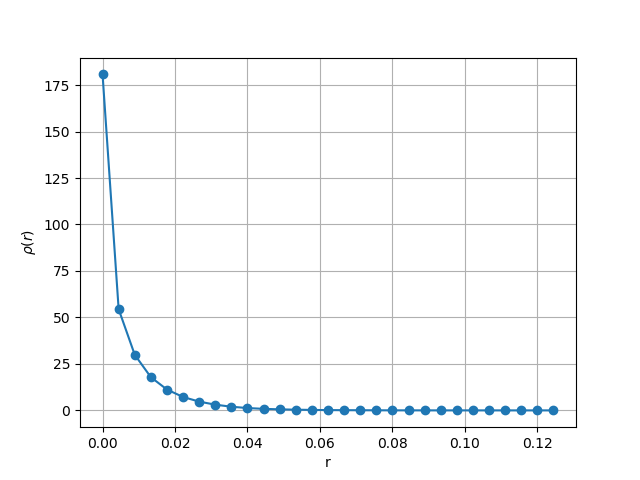

In [166]:
rbinsorig = np.linspace(1e-5,np.max(r),30)
hist = np.histogram(r,bins=rbinsorig)
rbins = hist[1][0:-1]
hbins = hist[0] 
norm = -np.trapz(rbins,hbins); print(norm)
hbins = hbins/norm
norm = -np.trapz(rbins,hbins); print(norm)

plt.figure()
plt.plot(rbins,hbins,'-o')
plt.xlabel('r')
plt.ylabel(r'$\rho(r)$')
plt.grid(True)

0.9999
65708.20168150705
1.0


<IPython.core.display.Javascript object>


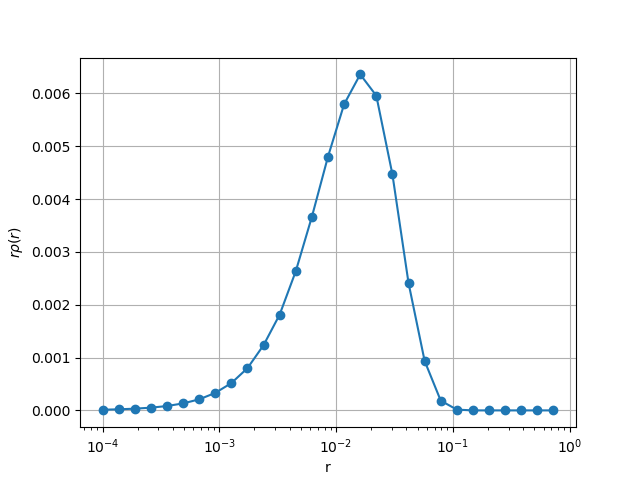

In [167]:
rminforhist = 1e-4
rmaxforhist = 1-rminforhist; print(rmaxforhist)
numforrhist = 30
rbinsorig = np.geomspace(rminforhist,rmaxforhist,numforrhist)
hist = np.histogram(r,bins=rbinsorig)
rbins = hist[1][0:-1]
hbins = hist[0] 
norm = -np.trapz(np.log(rbins),hbins); print(norm)
hbins = hbins/norm
norm = -np.trapz(np.log(rbins),hbins); print(norm)

plt.figure()
plt.semilogx(rbins,rbins*hbins,'-o')
plt.xlabel('r')
plt.ylabel(r'$r\rho(r)$')
plt.grid(True)

99999999.00002204
0.6
[2.00030004e-04 2.08827876e-02 4.15655452e-02 6.22483028e-02
 8.29310603e-02 1.03613818e-01 1.24296576e-01 1.44979333e-01
 1.65662091e-01 1.86344848e-01 2.07027606e-01 2.27710363e-01
 2.48393121e-01 2.69075879e-01 2.89758636e-01 3.10441394e-01]
[ 4.08373812  2.43177062  1.39385391  0.45539505 -0.48262072 -1.31355793
 -2.14251825 -2.90215517 -3.63352357 -4.48082143 -5.41237963 -5.89788745
 -6.27258089 -8.67047617 -8.67047617 -8.67047617]


<IPython.core.display.Javascript object>


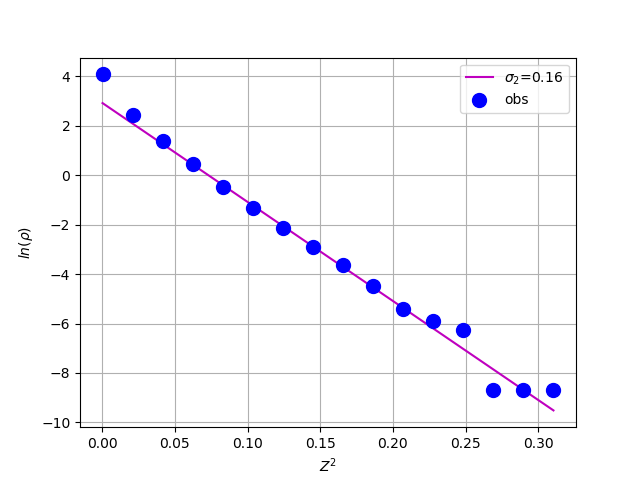

[-40.09256537   2.93051266] predicted sigma2 =  0.15793125155093365


In [168]:
# This calculates a normalized observed PDF as a function of Z^2 (rho(Z^2))
numforZ2hist = 30
Z2minforhist = 1/(1-rminforhist)**2-1; #print(Z2minforhist)
Z2maxforhist = 1/(1-rmaxforhist)**2-1; print(Z2maxforhist)
Z2maxforhist = .6; print(Z2maxforhist)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,numforZ2hist)
# #rbins = 1-(1/(Z2bins+1))**.5
# print(r)
Z2 = 1/(1-r)**2-1; #print(Z2)

hist = np.histogram(Z2,bins=Z2bins)
Z2bins = hist[1][0:-1]
hbins = hist[0] 
norm = -np.trapz(Z2bins,hbins); #print(norm)
hbins = hbins/norm
norm = -np.trapz(Z2bins,hbins); #print(norm)

ikeep = np.nonzero(hbins)
Z2keep = Z2bins[ikeep]; print(Z2keep)
logrhoZ2 = np.log(hbins[ikeep]); print(logrhoZ2)

plt.figure()
p2 = np.polyfit(Z2keep[2:10],logrhoZ2[2:10],1)
best_sigma2 = 1/np.sqrt(-p2[0])
print(p2,'predicted sigma2 = ', best_sigma2)
label_sigma2 = '$\sigma_2$='+str(np.round(best_sigma2*100)/100) 
plt.plot(Z2keep,np.polyval(p2,Z2keep),'m', label=label_sigma2)

# Graph the Z^2 PDF
plt.plot(Z2keep,logrhoZ2,'ob',markersize=10, label='obs')
plt.xlabel('$Z^2$')
plt.ylabel(r'$ln(\rho)$')
plt.grid(True)
#plt.ylim([np.min(logrhoZ2)-.5,np.max(logrhoZ2)+.5])
plt.legend()
